In [4]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv
from scripts.data_preprocessing import load_data, exclude_outliers
from sklearn.svm import SVR
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

# The process was not terminating for a long time...
# param_grid_svr = {
#     'kernel': ['poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3],  # Only relevant for 'poly' kernel
#     'gamma': ['scale', 'auto'],
#     'coef0': [0.0, 0.1, 1.0],  # Only relevant for 'poly' and 'sigmoid' kernels
#     'C': [0.1, 10, 100],
#     'epsilon': [0.01, 0.1],
#     'shrinking': [True, False]
# }

svr = SVR(kernel='poly', degree=3, C=50, epsilon=0.1)

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



K-fold
Mean MSE: 90.61110630652082
Mean MAE: 4.53877295298453
Mean R2: -0.40925466872518457
RMSE: 9.51898662182697


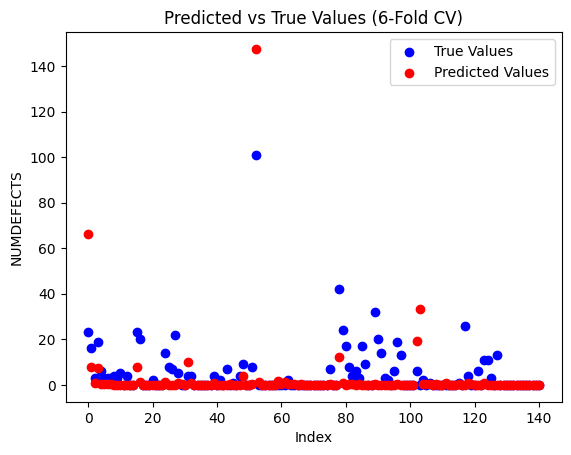

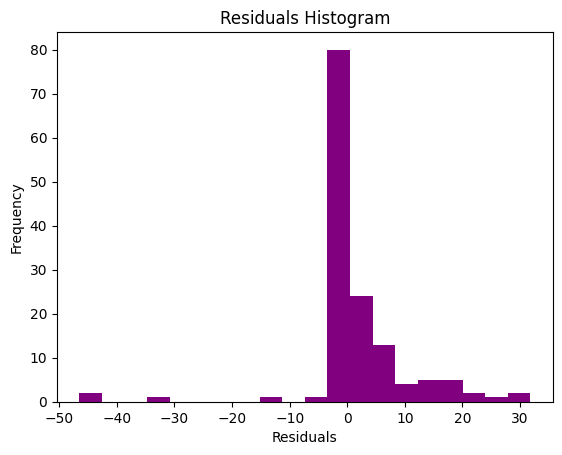

In [6]:
print('\nK-fold')
k_fold_results = k_fold_cv(X, y, svr, 6)

LOOCV
R squared (LOOCV): -0.314256542249826
Average MSE (LOOCV): 4378.521142086982
Average RMSE (LOOCV): 66.17039475541144
Average MAE (LOOCV): 10.403796104675754


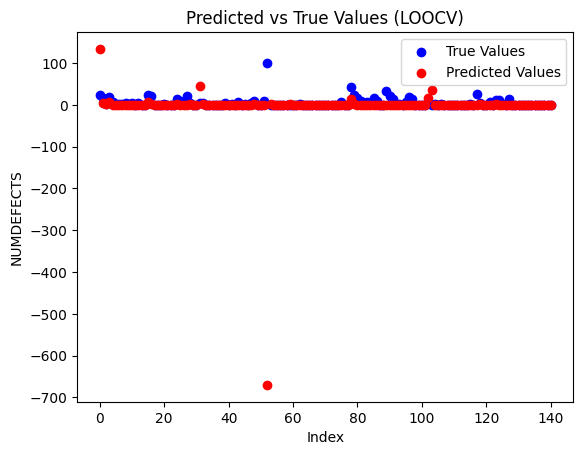

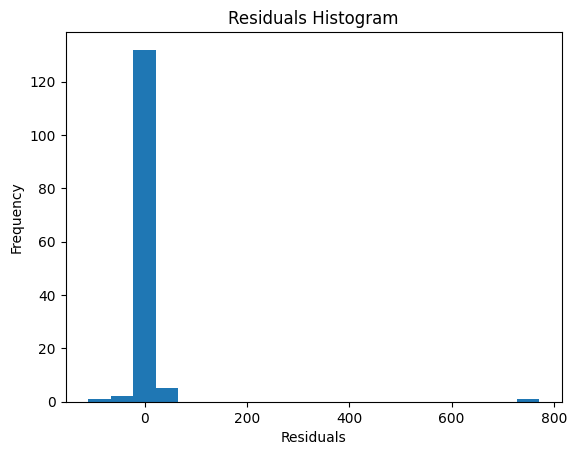

In [7]:
print('LOOCV')
loocv_results = loocv(X, y, svr)

In [11]:
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results,
    '6-Fold': [
        np.mean(k_fold_results['test_r2']),
        np.mean(k_fold_results['test_mse']),
        np.sqrt(np.mean(k_fold_results['test_mse'])),
        np.mean(k_fold_results['test_mae'])
    ]
})

print(comparison_table)

  Metric        LOOCV     6-Fold
0     R2    -0.314257  -0.409255
1    MSE  4378.521142  90.611106
2   RMSE    66.170395   9.518987
3    MAE    10.403796   4.538773


LOOCV
R squared (LOOCV): 0.04731171938679113
Average MSE (LOOCV): 182.43917478512225
Average RMSE (LOOCV): 13.507004656293054
Average MAE (LOOCV): 4.380576304501794


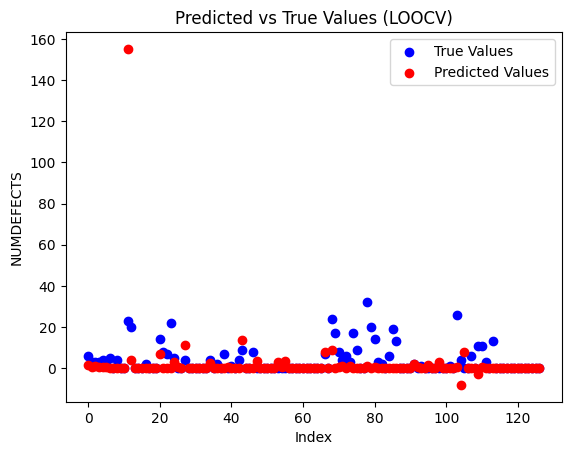

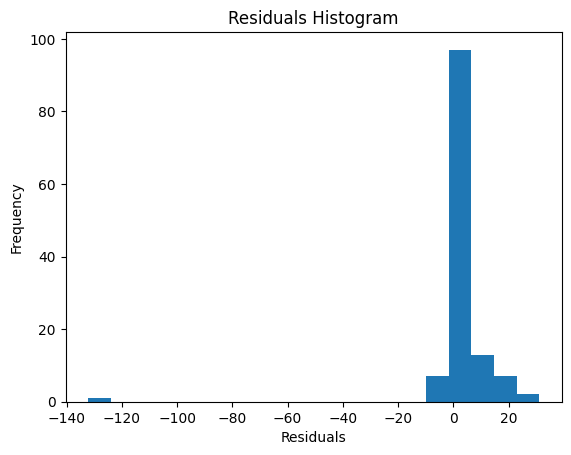


6-fold
Mean MSE: 49.42760708240541
Mean MAE: 3.5957387810515375
Mean R2: -0.28712791865733184
RMSE: 7.030477016704158


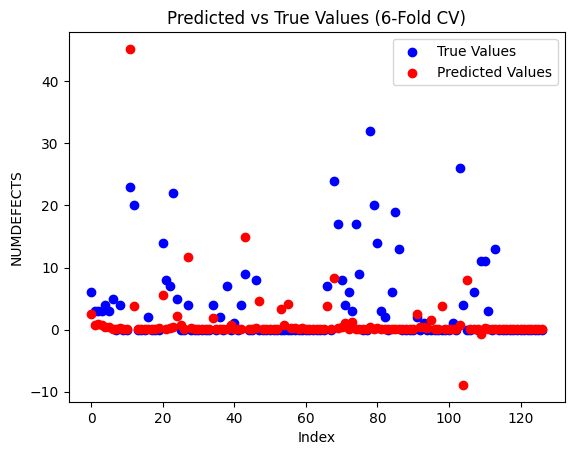

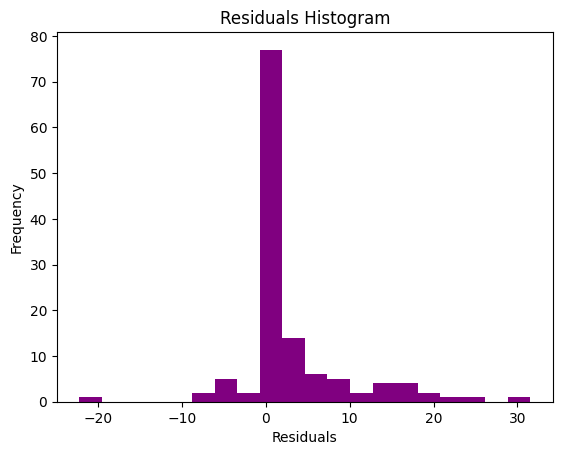

In [13]:
print('LOOCV')
loocv_results_filtered = loocv(X_filtered, y_filtered, svr)

print('\n6-fold')
k_fold_results_filtered = k_fold_cv(X_filtered, y_filtered, svr, 6)

In [14]:
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results_filtered,
    '6-Fold': [
        np.mean(k_fold_results_filtered['test_r2']),
        np.mean(k_fold_results_filtered['test_mse']),
        np.sqrt(np.mean(k_fold_results_filtered['test_mse'])),
        np.mean(k_fold_results_filtered['test_mae'])
    ]
})

print(comparison_table)

  Metric       LOOCV     6-Fold
0     R2    0.047312  -0.287128
1    MSE  182.439175  49.427607
2   RMSE   13.507005   7.030477
3    MAE    4.380576   3.595739
